<a href="https://colab.research.google.com/github/jalilabdelhamid/Deterministic/blob/main/Deterministic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I - Define geometry & mat:


*   Fuel: circle (r=1cm) UO2 enriche 3%
*   Clad: circle (r=1cm) clad Zr
*   Moderator: square (a=2cm) H2O






In [14]:
 # Four parameter to describe the geometry of the pin cell
 # Rayon of fuel zone
r_fuel = 1
 # Rayon of fuel cladding
r_clad = 1.2
 # On suppose the a square a (XY)
a_moderator = 1.5
z_moderator = 30



1.1- Verefied the position in pin cell

In [15]:

import numpy as np
import array as arr
import matplotlib.pyplot as plt

def  position_in_pin(x_pin,y_pin,z_pin) :
  r = np.sqrt(x_pin**2 + y_pin**2)
  if z_pin<=z_moderator/2 and z_pin>=-z_moderator/2:
    if  r <=r_fuel  :
      print("fuel") 
      return 1
    elif  r > r_fuel  and  r <= r_clad :
      print("clad") 
      return 2
    elif  r > r_clad  :
      if x_pin <= a_moderator and y_pin <= a_moderator:
        print("mod") 
        return 3
      else :
        print(" R out scope") 
        return 0
  else :
    print("Z out scope") 
    return 0


# Example
print(position_in_pin(1.0, 1.0, 2))

mod
3


**1.2- Set the materials**
ex:
mat_fuel(density,isotpe1,abundance_isotopique1 .....)

In [43]:
mat_fuel = [10.96,"U235",0.000743,"U238",0.023697,"O16",0.048899]
mat_clad = [6.4516,"Zr90",0.042949]
mat_mod = [1.0033,"H1",6.717E-2,"O16",3.358E-2]

mat_test = [1,"O16",6.717E-2]
mat_test1 = []

In [38]:
# Function return the name of isotopes 
def f_isotope_name(x):
  nbr_iso = int((len(x)-1)/2) 
  y = [None] * (nbr_iso)
  j = 0
  for k in range(1,len(x) ,2):
    y[j] = x[k]
    j = j + 1
  return y

# Function return the abundance of isotopes 
def f_isotope_abundance(x):
  nbr_iso = int((len(x)-1)/2) 
  y = [None] * (nbr_iso)
  j = 0
  for k in range(2,len(x) ,2):
    y[j] = x[k]
    j = j + 1
  return y


def f_mat_density(x):
    return x[0]


# Example
print(f_isotope_name(mat_test))
print(f_isotope_abundance(mat_test))

['O16']
[0.06717]



## **II-a Define spectrum**


In [23]:
# x_E in [MeV]
# total thermal neutron density
n_0 = 1e15
# Constants
# MeV/c2
m_n = 939.56542052
#MeV/K
k_b = 8.6173303e-11


def fission_spectrum(x_E):
  return n_0 * np.sqrt((2*x_E)/m_n) * 0.453 * np.exp(-1.036 * x_E) * np.sinh(np.sqrt(2.29 * x_E))

def down_spectrum(x_E):
  return n_0*0.001032033370073226 /(x_E**(0.5))

def thermal_spectrum(x_E):
  return n_0 * np.sqrt((2*x_E)/m_n) * ((2*np.pi*np.sqrt(x_E))/np.sqrt((np.pi*300*k_b)**3)) * np.exp(-x_E/(300*k_b))

# set energy groups [MeV]
energy_structure_VITAMINE_174 = arr.array('d',[1.96E+01, 1.73E+01, 1.69E+01, 1.65E+01, 1.57E+01, 1.49E+01, 1.46E+01, 1.42E+01, 1.38E+01, 1.35E+01, 1.25E+01, 1.22E+01, 1.16E+01, 1.11E+01, 1.05E+01, 1.00E+01, 9.51E+00, 9.05E+00, 8.61E+00, 8.19E+00, 7.79E+00, 7.41E+00, 7.05E+00, 6.70E+00, 6.59E+00, 6.38E+00, 6.07E+00, 5.77E+00, 5.49E+00, 5.22E+00, 4.97E+00, 4.72E+00, 4.49E+00, 4.07E+00, 3.68E+00, 3.33E+00, 3.17E+00, 3.01E+00, 2.87E+00, 2.73E+00, 2.59E+00, 2.47E+00, 2.39E+00, 2.37E+00, 2.35E+00, 2.31E+00, 2.23E+00, 2.12E+00, 2.02E+00, 1.92E+00, 1.83E+00, 1.74E+00, 1.65E+00, 1.57E+00, 1.50E+00, 1.42E+00, 1.35E+00, 1.29E+00, 1.22E+00, 1.16E+00, 1.11E+00, 1.00E+00, 9.62E-01, 9.07E-01, 8.63E-01, 8.21E-01, 7.81E-01, 7.43E-01, 7.07E-01, 6.72E-01, 6.39E-01, 6.08E-01, 5.78E-01, 5.50E-01, 5.23E-01, 4.98E-01, 4.50E-01, 4.08E-01, 3.88E-01, 3.69E-01, 3.34E-01, 3.02E-01, 2.99E-01, 2.97E-01, 2.95E-01, 2.87E-01, 2.73E-01, 2.47E-01, 2.35E-01, 2.24E-01, 2.13E-01, 2.02E-01, 1.93E-01, 1.83E-01, 1.74E-01, 1.66E-01, 1.58E-01, 1.50E-01, 1.43E-01, 1.36E-01, 1.29E-01, 1.23E-01, 1.17E-01, 1.11E-01, 9.80E-02, 8.65E-02, 8.25E-02, 7.95E-02, 7.20E-02, 6.74E-02, 5.66E-02, 5.25E-02, 4.63E-02, 4.09E-02, 3.43E-02, 3.18E-02, 2.85E-02, 2.70E-02, 2.61E-02, 2.48E-02, 2.42E-02, 2.36E-02, 2.19E-02, 1.93E-02, 1.50E-02, 1.17E-02, 1.06E-02, 9.12E-03, 7.10E-03, 5.53E-03, 4.31E-03, 3.71E-03, 3.35E-03, 3.04E-03, 2.75E-03, 2.61E-03, 2.49E-03, 2.25E-03, 2.03E-03, 1.58E-03, 1.23E-03, 9.61E-04, 7.49E-04, 5.83E-04, 4.54E-04, 3.54E-04, 2.75E-04, 2.14E-04, 1.67E-04, 1.30E-04, 1.01E-04, 7.89E-05, 6.14E-05, 4.79E-05, 3.73E-05, 2.90E-05, 2.26E-05, 1.76E-05, 1.37E-05, 1.07E-05, 8.32E-06, 6.48E-06, 5.04E-06, 3.93E-06, 3.06E-06, 2.38E-06, 1.86E-06, 1.45E-06, 1.13E-06, 8.76E-07, 6.83E-07, 5.32E-07, 4.14E-07, 1.00E-07, 1.00E-11])
energy_ = arr.array('d',[1.96E+01, 1.73E+01, 1.69E+01, 1.65E+01, 1.57E+01, 1.49E+01, 1.46E+01, 1.42E+01, 1.38E+01, 1.35E+01, 1.25E+01, 1.22E+01, 1.16E+01, 1.11E+01, 1.05E+01, 1.00E+01, 9.51E+00, 9.05E+00, 8.61E+00, 8.19E+00, 7.79E+00, 7.41E+00, 7.05E+00, 6.70E+00, 6.59E+00, 6.38E+00, 6.07E+00, 5.77E+00, 5.49E+00, 5.22E+00, 4.97E+00, 4.72E+00, 4.49E+00, 4.07E+00, 3.68E+00, 3.33E+00, 3.17E+00, 3.01E+00, 2.87E+00, 2.73E+00, 2.59E+00, 2.47E+00, 2.39E+00, 2.37E+00, 2.35E+00, 2.31E+00, 2.23E+00, 2.12E+00, 2.02E+00, 1.92E+00, 1.83E+00, 1.74E+00, 1.65E+00, 1.57E+00, 1.50E+00, 1.42E+00, 1.35E+00, 1.29E+00, 1.22E+00, 1.16E+00, 1.11E+00, 1.00E+00, 9.62E-01, 9.07E-01, 8.63E-01, 8.21E-01, 7.81E-01, 7.43E-01, 7.07E-01, 6.72E-01, 6.39E-01, 6.08E-01, 5.78E-01, 5.50E-01, 5.23E-01, 4.98E-01, 4.50E-01, 4.08E-01, 3.88E-01, 3.69E-01, 3.34E-01, 3.02E-01, 2.99E-01, 2.97E-01, 2.95E-01, 2.87E-01, 2.73E-01, 2.47E-01, 2.35E-01, 2.24E-01, 2.13E-01, 2.02E-01, 1.93E-01, 1.83E-01, 1.74E-01, 1.66E-01, 1.58E-01, 1.50E-01, 1.43E-01, 1.36E-01, 1.29E-01, 1.23E-01, 1.17E-01, 1.11E-01, 9.80E-02, 8.65E-02, 8.25E-02, 7.95E-02, 7.20E-02, 6.74E-02, 5.66E-02, 5.25E-02, 4.63E-02, 4.09E-02, 3.43E-02, 3.18E-02, 2.85E-02, 2.70E-02, 2.61E-02, 2.48E-02, 2.42E-02, 2.36E-02, 2.19E-02, 1.93E-02, 1.50E-02, 1.17E-02, 1.06E-02, 9.12E-03, 7.10E-03, 5.53E-03, 4.31E-03, 3.71E-03, 3.35E-03, 3.04E-03, 2.75E-03, 2.61E-03, 2.49E-03, 2.25E-03, 2.03E-03, 1.58E-03, 1.23E-03, 9.61E-04, 7.49E-04, 5.83E-04, 4.54E-04, 3.54E-04, 2.75E-04, 2.14E-04, 1.67E-04, 1.30E-04, 1.01E-04, 7.89E-05, 6.14E-05, 4.79E-05, 3.73E-05, 2.90E-05, 2.26E-05, 1.76E-05, 1.37E-05, 1.07E-05, 8.32E-06, 6.48E-06, 5.04E-06, 3.93E-06, 3.06E-06, 2.38E-06, 1.86E-06, 1.45E-06, 1.13E-06, 8.76E-07, 6.83E-07, 5.32E-07, 4.14E-07, 3e-7,2e-7,1.00E-07,9e-8,7e-8,6e-8,4e-8,1e-8,1e-10,5e-10, 1.00E-11])

# set interval of energy to calcul the all of spectrum
# thermal [0 - 1ev]
# epithermal [1eV - 0.1MeV]
# rapid [0.1MeV - 20MeV]
def flux_w(energies):
  y =  np.zeros(len(energies))
  for i in range (len(energies)-1,-1,-1):
    if energies[i] <= 8.e-08:
      y[i] = thermal_spectrum(energies[i])
      #print(energies[i] ,y[i])
    elif energies[i] <= 1e-1:
      y[i] = down_spectrum(energies[i])
      #print(energies[i] ,y[i]) 
    elif energies[i] > 1e-1:
      y[i] = fission_spectrum(energies[i])
      #print(energies[i] ,y[i])

  return y

def plot(x,y) :
  plt.plot(x,y,label="spectrum")
  plt.xscale('log')
  plt.yscale('log')
  plt.title('flux')
  plt.xlabel("Energy MeV")
  plt.ylabel("flux n/cm2.s")
  plt.show()


In [19]:
flux_w(energy_)

array([5.70447392e+07, 3.87173878e+08, 5.38283843e+08, 7.47509073e+08,
       1.43630136e+09, 2.74547912e+09, 3.49551411e+09, 4.81738159e+09,
       6.62898637e+09, 8.41336086e+09, 1.84938920e+10, 2.33710564e+10,
       3.71982540e+10, 5.45938791e+10, 8.61050263e+10, 1.25334021e+11,
       1.80326367e+11, 2.52712701e+11, 3.47616480e+11, 4.69432615e+11,
       6.22514478e+11, 8.10854401e+11, 1.03771573e+12, 1.31400751e+12,
       1.41403943e+12, 1.62476678e+12, 1.98874135e+12, 2.40979053e+12,
       2.87288603e+12, 3.39183774e+12, 3.94261085e+12, 4.56707459e+12,
       5.21128429e+12, 6.57053747e+12, 8.04890446e+12, 9.54178766e+12,
       1.02685484e+13, 1.10165246e+13, 1.16831232e+13, 1.23550446e+13,
       1.30252102e+13, 1.35917722e+13, 1.39621472e+13, 1.40535256e+13,
       1.41443476e+13, 1.43241754e+13, 1.46754841e+13, 1.51361946e+13,
       1.55267681e+13, 1.58838357e+13, 1.61706655e+13, 1.64188299e+13,
       1.66220145e+13, 1.67592867e+13, 1.68416320e+13, 1.68874789e+13,
      

Download cross section ENDF/BVII.1 (HDF5) source OPENMC

In [12]:

!wget https://anl.app.box.com/public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
!tar -xvf 9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz


--2022-12-16 17:58:22--  https://anl.app.box.com/public/static/9igk353zpy8fn9ttvtrqgzvw1vtejoz6.xz
Resolving anl.app.box.com (anl.app.box.com)... 74.112.186.144
Connecting to anl.app.box.com (anl.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud.com/d/1/b1!oeGSQ_ce8nB5-cu3bVnpmULZg2sU4TWg73VnlH6sYIxA181OuZHxi2qDXhPtlANBQY58wMy7X58TrTgeAJc7CfYEOV9XJkg92N45houQHOng7Ol-MO77TkQv33Uq7KIbmQJhQFOQnzQgPjF8Sm84eXE96jYI3y01QiVUUv7GVYOpHuIY6DjsKRoKhoU3yjvRaeHQhBdZpE5QON8dIzFdeL2FvrO7wCHJHDmdv1cSkh58MhaJnvQ867HQsad_2qLfj21Z0oCXg0vJBSovnY5rhuB8afnpRNkpT6m6PO1VNEu-V1OLAUFCEZSZbR_b71-ggdxzG8bn4JSktCuXMYrYOsVS3vo4DVLi971jcdLSJhTVMeRY8E6WtSmW0-irCRR-ZX0st7PX3-WxdiCzRU3sv-ytH_7Hv5eckYblqTS5gNHwPDheGMzvH2W9vJppx7mqG-YKvdSBfF82Cosos4iJ2FgbXdY4Evb75n6QRgLBtn2XNAyqz5-BOvNDRB1egl9-ezxRsNLhUTx8F5bok4JpiARqnGSm7KbtnUe9NvGpiSB1JWqhjK7gXE3RaEyKpaeoBjNuQ_h4QZ6u14wIxbZRsev0hJv80uco-WcwAtO63AgnIHwzSBsdvMqDnon7UfAQ4EPmLIBR0gbWEOvFGSfASgagP

## **II-b Acces to neutron cross section file**
the indices of reaction from:
https://t2.lanl.gov/nis/endf/mts.html

In [13]:
%cd endfb-vii.1-hdf5
%cd neutron


/content/endfb-vii.1-hdf5/neutron/endfb-vii.1-hdf5
/content/endfb-vii.1-hdf5/neutron/endfb-vii.1-hdf5/neutron


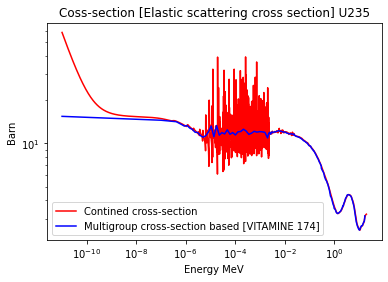

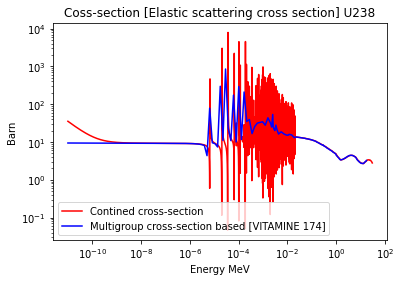

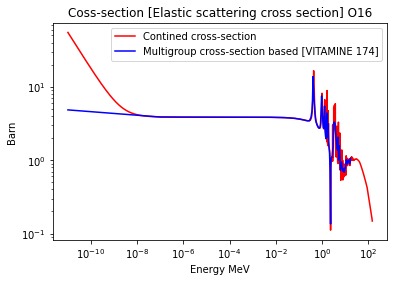

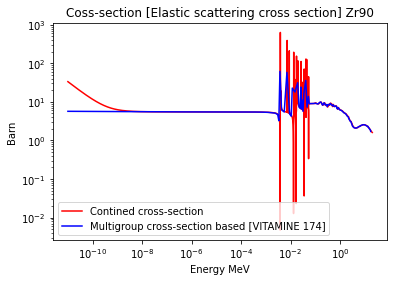

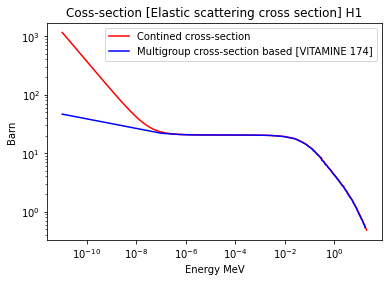

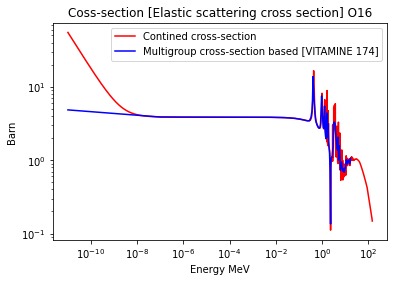

In [131]:
import h5py
from scipy import integrate
# Boucle to scann Materials
for j in (mat_fuel, mat_clad, mat_mod):
#for j in (mat_test, mat_test1):
  #Boucle to scann isotopes & read them
  for i in (f_isotope_name(j)):
    #load data from hdf5 file
    
    f = h5py.File(str(i)+'.h5', 'r')
      # Set data on contined energy eV
    dset_energy = f[str(i)]['energy']['294K']
      # Set data on contined cross section
    dset_micro_xs_cont = f[str(i)]['reactions']['reaction_002']['294K']['xs']
    I_ = np.zeros(174)
    Y_flux_sigma = np.zeros(174)
    Y_flux = np.zeros(174)
    N_t = 0
    res = [x * 1e-6  for x in dset_energy]
    func_flux_sigma = flux_w(res) * dset_micro_xs_cont
    func_flux = flux_w(res)
    g = 0
    Y_enrgy = np.zeros(174)
    for k in range(len(energy_structure_VITAMINE_174)-1,0 ,-1):
      
      #Element to calculate the integral between two energies 
      b_a = energy_structure_VITAMINE_174[k-1] - energy_structure_VITAMINE_174[k]
      N_ = 0
      X_ = 0
      Y_ = 0
      
      for t in range (len(res)):
        if (res[t] > energy_structure_VITAMINE_174[k] and res[t] <= energy_structure_VITAMINE_174[k-1]):
          N_ += 1
          N_t += 1
          X_ += func_flux_sigma[t]
          Y_ += func_flux[t]
      #print(k,"-",k-1,"=",b_a, "N= ",N_ ,"Somme(flux*sigma)= ", X_, "Somme(flux)= ",Y_ )  

      Y_enrgy[g] = energy_structure_VITAMINE_174[k]
      Y_flux_sigma[g] =  X_
      Y_flux[g] = Y_
      g+=1
      #
    
    #This boucle solve the 0 flux integral by mean(g-1 and g+1)
    for z in range(len(Y_enrgy)):
      if (Y_flux[z] == 0) :
        Y_flux[z] = (Y_flux[z-1]+Y_flux[z+1])/2
        Y_flux_sigma[z] = (Y_flux_sigma[z-1]+Y_flux_sigma[z+1])/2

    #This boucle solve sigma group
    for z in range(len(Y_enrgy)):
      I_[z] = Y_flux_sigma[z]/Y_flux[z]


    #print(N_t)
    #print(Y_enrgy)
    #print(I_)
    #plot(Y_enrgy,I_) 
    res_cross = [x * 1  for x in dset_micro_xs_cont]
    
    
    plt.plot(res,res_cross,'r',label="Contined cross-section")
    plt.plot(Y_enrgy,I_,'b',label="Multigroup cross-section based [VITAMINE 174]")
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Coss-section [Elastic scattering cross section] '+str(i) )
    plt.xlabel("Energy MeV")
    plt.ylabel("Barn")
    plt.legend()
    plt.show()
    #plot(dset_energy,dset_micro_xs_cont)



In [ ]:
plt

In [ ]:
dset_energy = f['H1']['energy']['294K']
dset_micro_xs = f['H1']['reactions']['reaction_002']['294K']['xs']
x = np.zeros(dset_energy.size)
y = np.zeros(dset_energy.size)
y_f = np.zeros(dset_energy.size)
for i in range (0,dset_energy.size):
  #print(f"enery= {dset_energy[i]}   {dset_micro_xs[i]}")
  x[i] = dset_energy[i] 
  y[i] = dset_micro_xs[i]
  y_f[i] = thermal_spectrum(x[i] ,300.0)


In [ ]:
print(thermal_spectrum(1,300.0))